In [1]:
import xarray as xr
import torch
import plotly.express as px
from torchvision.io import write_png, read_image
import torch.nn as nn

# Results are here

results are in results/HAT-L_SRx4_ImageNet-pretrain-finetune_SouthPole_KB/visualization/ANT_test_DOME_C

In [2]:
bm_xr = xr.load_dataset("~/data/nsidc/BedMachineAntarctica-v3.nc")

### Get Min and range from HAT (larger) 1280 x 1280 area to converst back

In [3]:
# Domain for HAT (larger)
domea_hat_y_min = 0
domea_hat_y_max = 639500
domea_hat_x_min = 899000
domea_hat_x_max = 1538500

In [12]:
HAT_domea_bm_xr = bm_xr.sel(x = slice(domea_hat_x_min, domea_hat_x_max), 
                            y = slice(domea_hat_y_max, domea_hat_y_min))

print("Dimensions", HAT_domea_bm_xr.dims)

train_tensor = torch.tensor(HAT_domea_bm_xr.bed.values).unsqueeze(0)

IMAGE_DIM = 256
N_ROW_IMAGES = int(HAT_domea_bm_xr.bed.values.shape[0]/IMAGE_DIM)
N_COLUMN_IMAGES = int(HAT_domea_bm_xr.bed.values.shape[1]/IMAGE_DIM)

image_tensor = torch.empty(size = (0, 1, IMAGE_DIM, IMAGE_DIM))

for row in range(0, N_ROW_IMAGES):
    row_min = row * IMAGE_DIM
    row_max = row_min + IMAGE_DIM

    for column in range(0, N_COLUMN_IMAGES):
        column_min = column * IMAGE_DIM
        column_max = column_min + IMAGE_DIM

        image_tensor = torch.cat((image_tensor, train_tensor[:, row_min : row_max, column_min : column_max].unsqueeze(0)), dim = 0)

min_values, _ = torch.min(image_tensor.reshape(image_tensor.shape[0], -1), dim = -1)
max_values, _ = torch.max(image_tensor.reshape(image_tensor.shape[0], -1), dim = -1)
range_values = max_values - min_values

Dimensions Frozen({'x': 1280, 'y': 1280})


In [20]:
def load_test_estimates_project_back_SP(min_tensor, range_tensor):
    # Initialise empty tensor
    all_images = torch.empty(size = (0, 256, 256))
    # iterate
    for i in range(25):
        # Create filename: string with contant length
        number = str(i)
        while(len(number) < 4):
            number = '0' + number
        
        # print(number)
        path = "results/HAT-L_SRx4_ImageNet-pretrain-finetune_SouthPole_KB/visualization/ANT_test_DOME_C/" + number + "_HAT-L_SRx4_ImageNet-pretrain-finetune_SouthPole_KB.png"

        image = read_image(path)
        
        og = (torch.sum(image, dim = 0)/(3 * 255) * range_tensor[i]) + min_tensor[i]
        all_images = torch.cat((all_images, og.unsqueeze(0)), dim = 0)

    return(all_images)

In [21]:
all = load_test_estimates_project_back_SP(min_values, range_values)

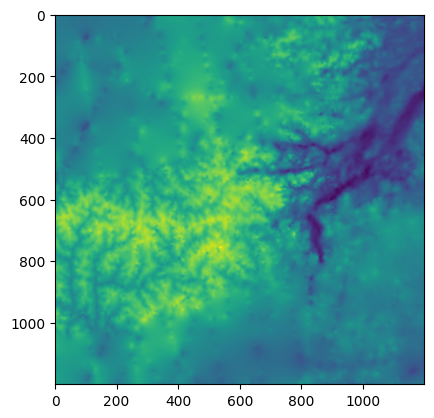

In [23]:
big_image = all[:, :, :].reshape(5, 5, 256, 256).permute(0, 2, 1, 3).reshape(1280, 1280)
same_area = big_image[80:1280, 0:1200]

import matplotlib.pyplot as plt
plt.imshow(same_area)

In [25]:
same_area.shape

torch.Size([1200, 1200])

In [ ]:
torch.save(same_area, "/home/kim/finetune-HAT/finetuning-results/HAT_finetuned_SouthPole_predictions_DOME_A.pt")
torch.save(same_area, "/home/kim/HAT_finetuned_SouthPol_predictions_DOME_A.pt")